In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
print("Dataset Shape:", df.shape)
print("\nFirst Few Rows:")
df.head()

Dataset Shape: (41188, 21)

First Few Rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("\n=== DATASET INFO ===")
print(df.info())
print("\n=== DATA TYPES ===")
print(df.dtypes)


=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

In [4]:
print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100)[df.isnull().sum() > 0])


=== MISSING VALUES ===
No missing values

Missing Values Percentage:
Series([], dtype: float64)


In [5]:
print("\n=== STATISTICAL SUMMARY ===")
print(df.describe())


=== STATISTICAL SUMMARY ===
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960      

In [6]:
# Cell 6: Categorical Variables Overview
print("\n=== CATEGORICAL VARIABLES ===")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())


=== CATEGORICAL VARIABLES ===

job: 12 unique values
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital: 4 unique values
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education: 8 unique values
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default: 3 unique values
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing: 3 unique values
housing
yes        21576
no         18622
unknown      990
Name: count, dty


=== TARGET VARIABLE DISTRIBUTION ===

=== TARGET VARIABLE: y ===
y
no     36548
yes     4640
Name: count, dtype: int64

Target Distribution (%):
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


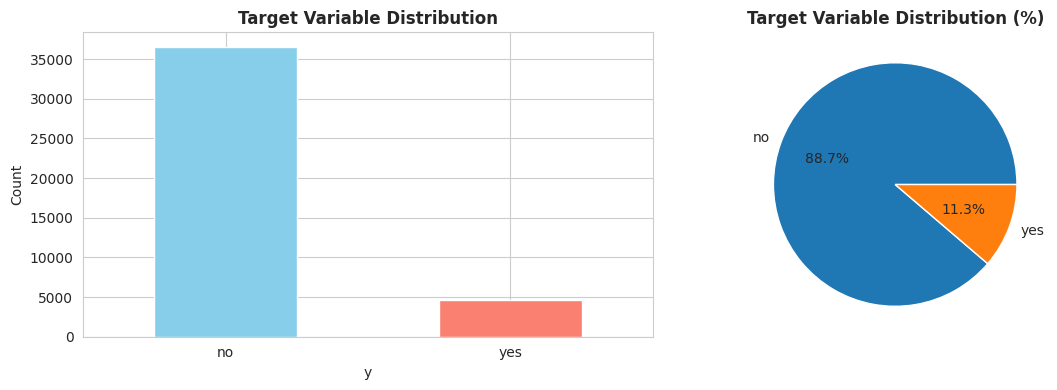

In [ ]:
# Cell 7: Target Variable Distribution
target_col = 'y' 
print("\n=== TARGET VARIABLE DISTRIBUTION ===")
if target_col in df.columns:
    print(f"\n=== TARGET VARIABLE: {target_col} ===")
    print(df[target_col].value_counts())
    print("\nTarget Distribution (%):")
    print(df[target_col].value_counts(normalize=True) * 100)
    
    # Visualize target distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    df[target_col].value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
    ax1.set_title('Target Variable Distribution', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Count')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    
    df[target_col].value_counts(normalize=True).plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    ax2.set_title('Target Variable Distribution (%)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()


=== NUMERICAL COLUMNS (10) ===
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


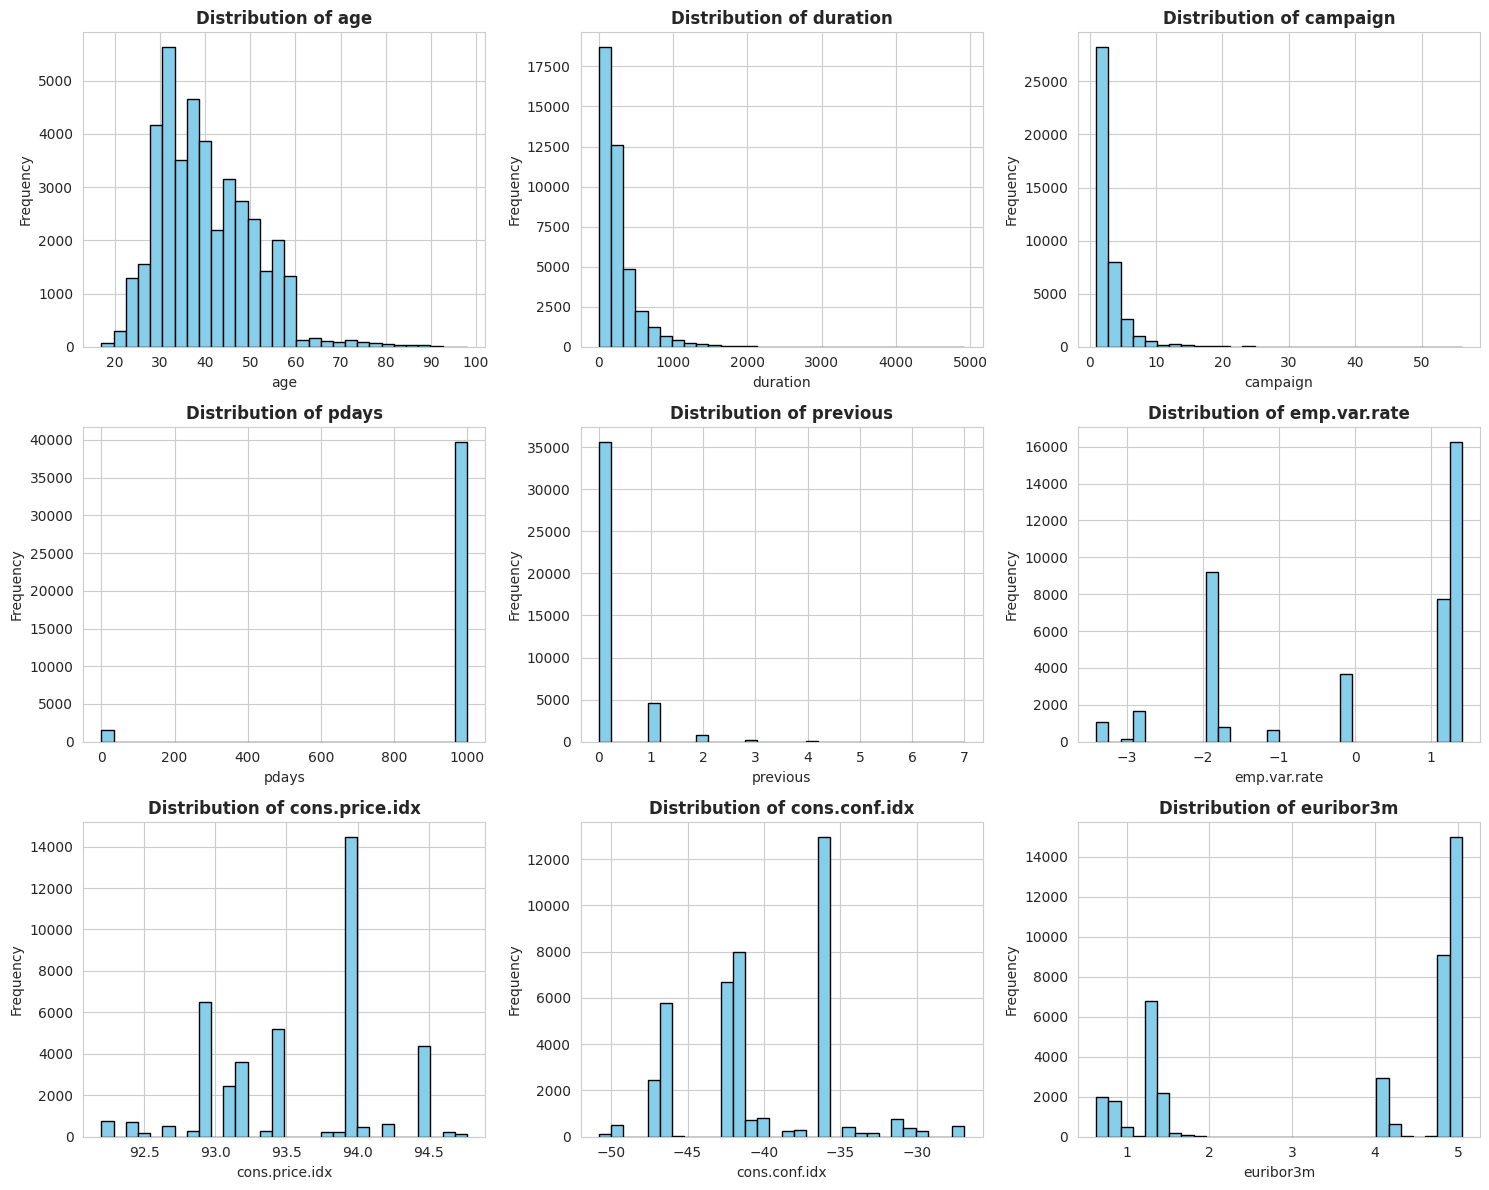

In [ ]:
# Cell 8: Numerical Variables Distribution
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n=== NUMERICAL COLUMNS ({len(num_cols)}) ===")
print(num_cols)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols[:9]):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide unused subplots
for idx in range(len(num_cols[:9]), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


=== CORRELATION MATRIX ===
                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
c

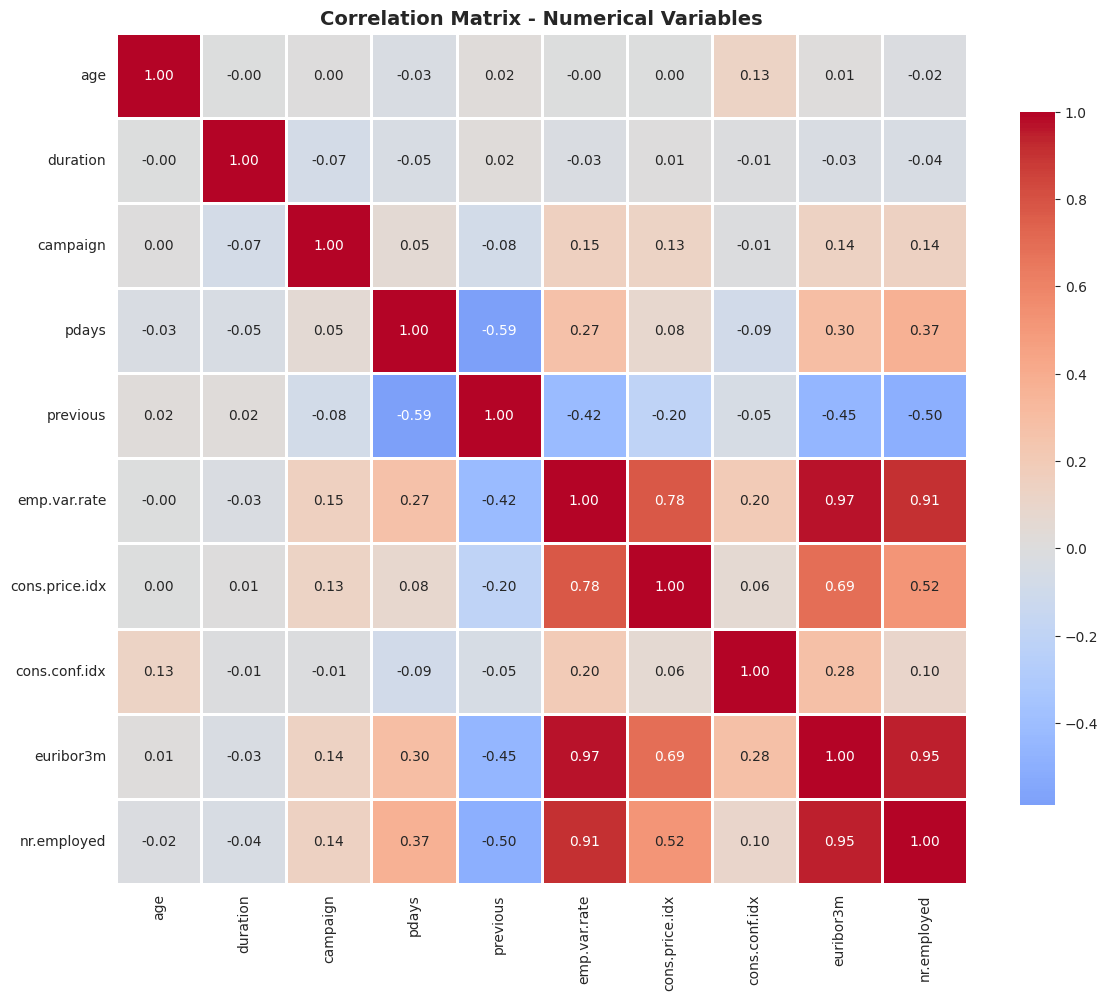

In [9]:
# Cell 9: Correlation Analysis
print("\n=== CORRELATION MATRIX ===")
corr_matrix = df[num_cols].corr()
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:
# Cell 10: Outlier Detection (IQR Method)
print("\n=== OUTLIER DETECTION (IQR METHOD) ===")
outliers_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        outliers_summary[col] = len(outliers)
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

if not outliers_summary:
    print("No significant outliers detected using IQR method")


=== OUTLIER DETECTION (IQR METHOD) ===
age: 469 outliers (1.14%)
duration: 2963 outliers (7.19%)
campaign: 2406 outliers (5.84%)
pdays: 1515 outliers (3.68%)
previous: 5625 outliers (13.66%)
cons.conf.idx: 447 outliers (1.09%)


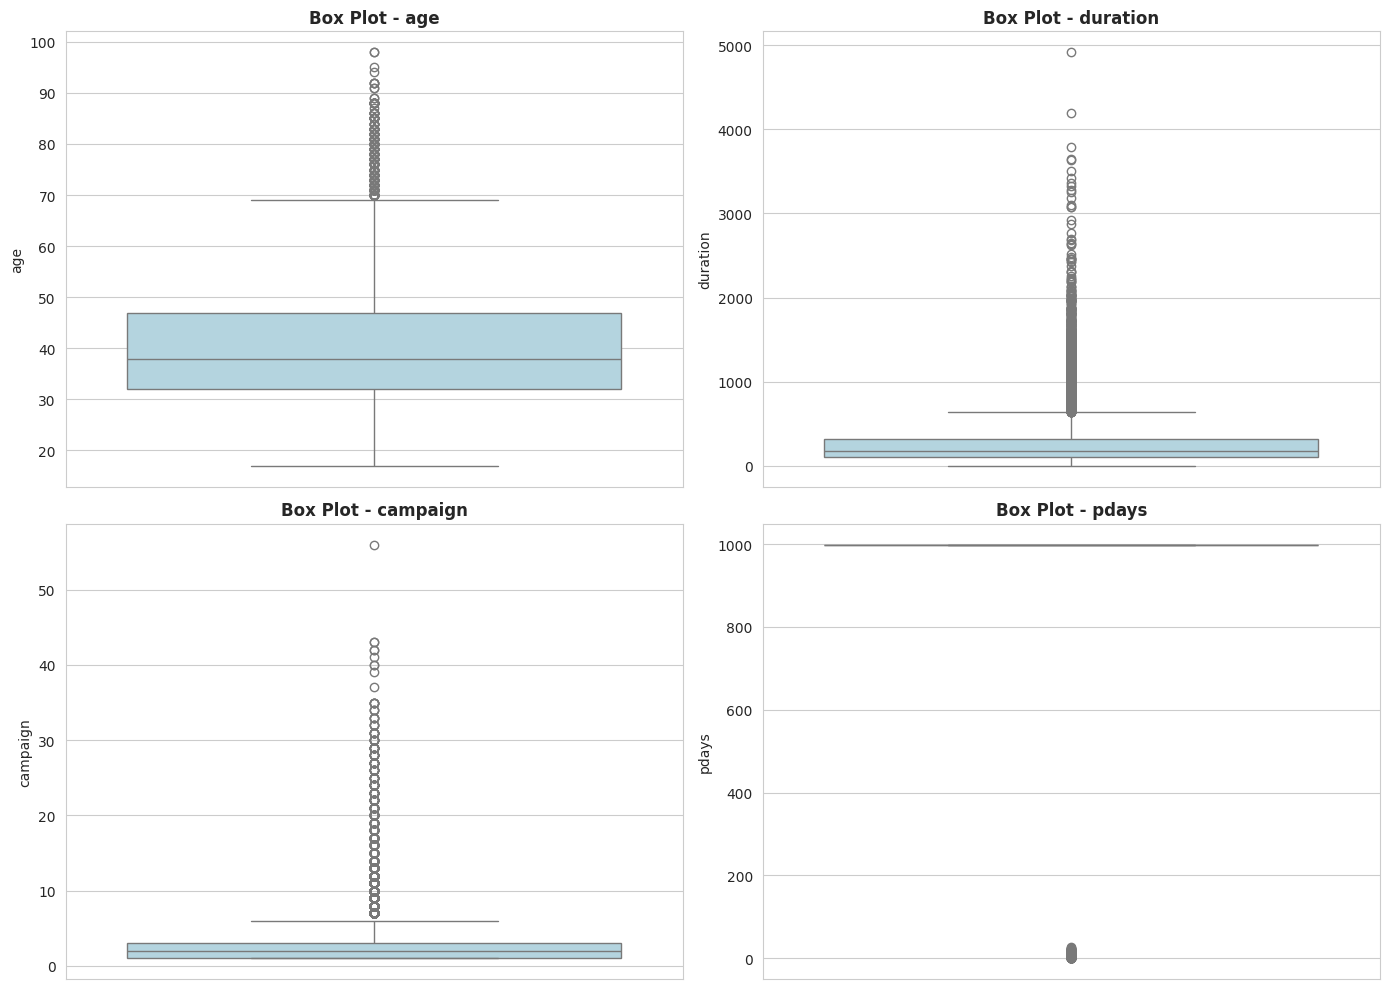

In [11]:
# Cell 11: Box Plots for Numerical Variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(num_cols[:4]):
    sns.boxplot(y=col, data=df, ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Box Plot - {col}', fontweight='bold')

plt.tight_layout()
plt.show()


=== CATEGORICAL COLUMNS (11) ===
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


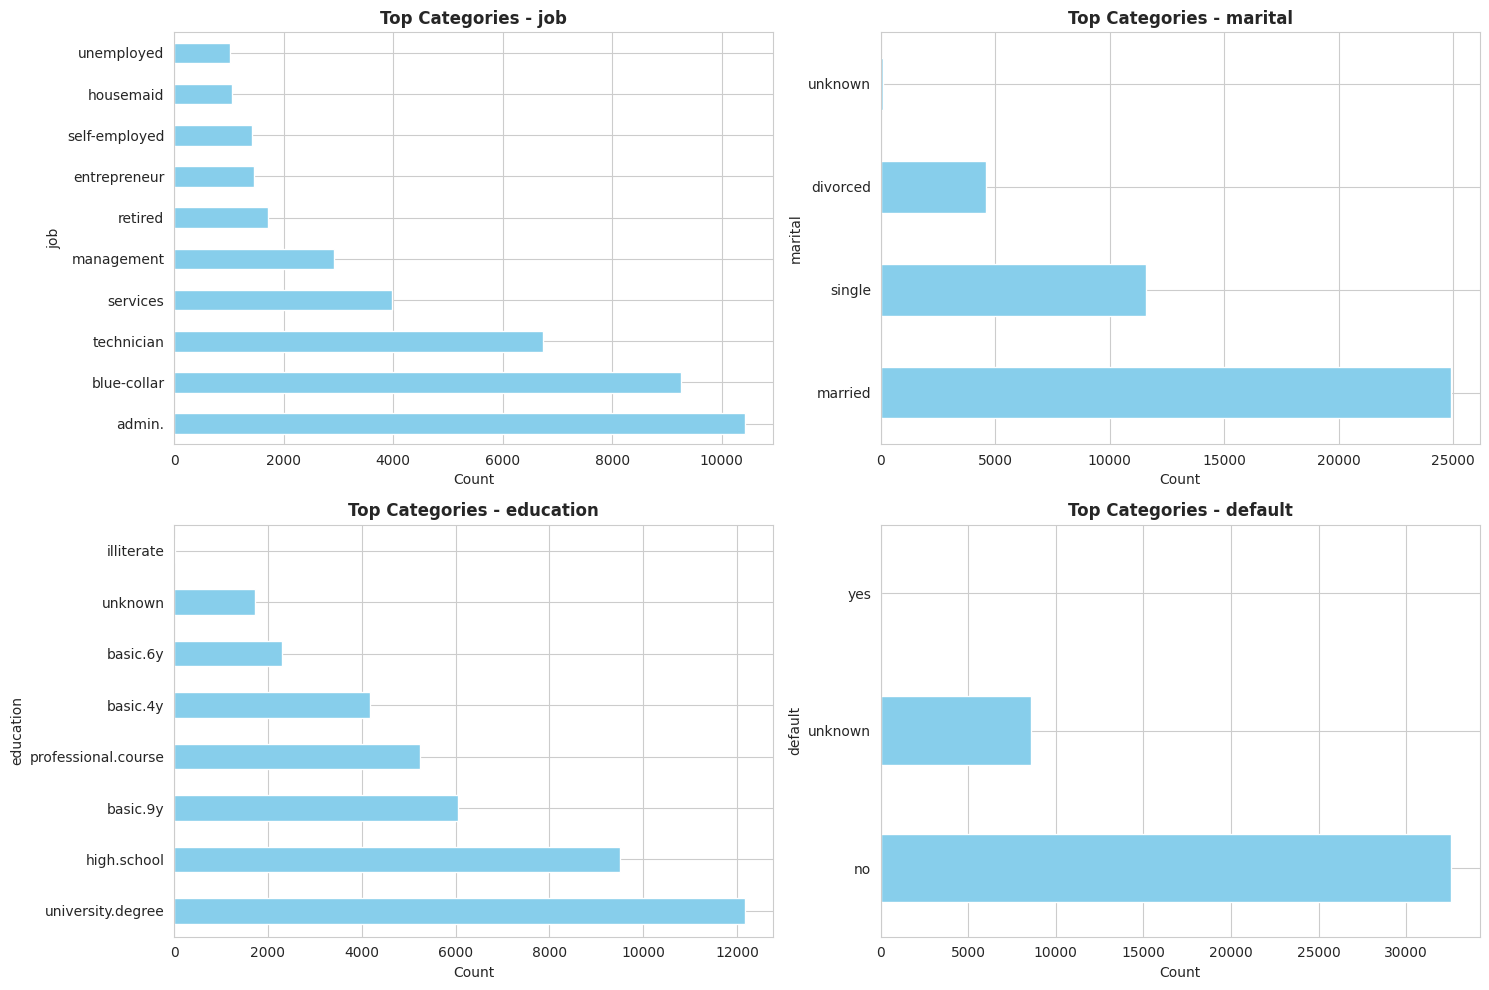

In [13]:
# Cell 12: Categorical Variables Visualizations
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\n=== CATEGORICAL COLUMNS ({len(cat_cols)}) ===")
print(cat_cols)

# Top categories visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_cols[:4]):
    df[col].value_counts().head(10).plot(kind='barh', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Top Categories - {col}', fontweight='bold')
    axes[idx].set_xlabel('Count')

plt.tight_layout()
plt.show()


=== TARGET vs NUMERICAL VARIABLES ===


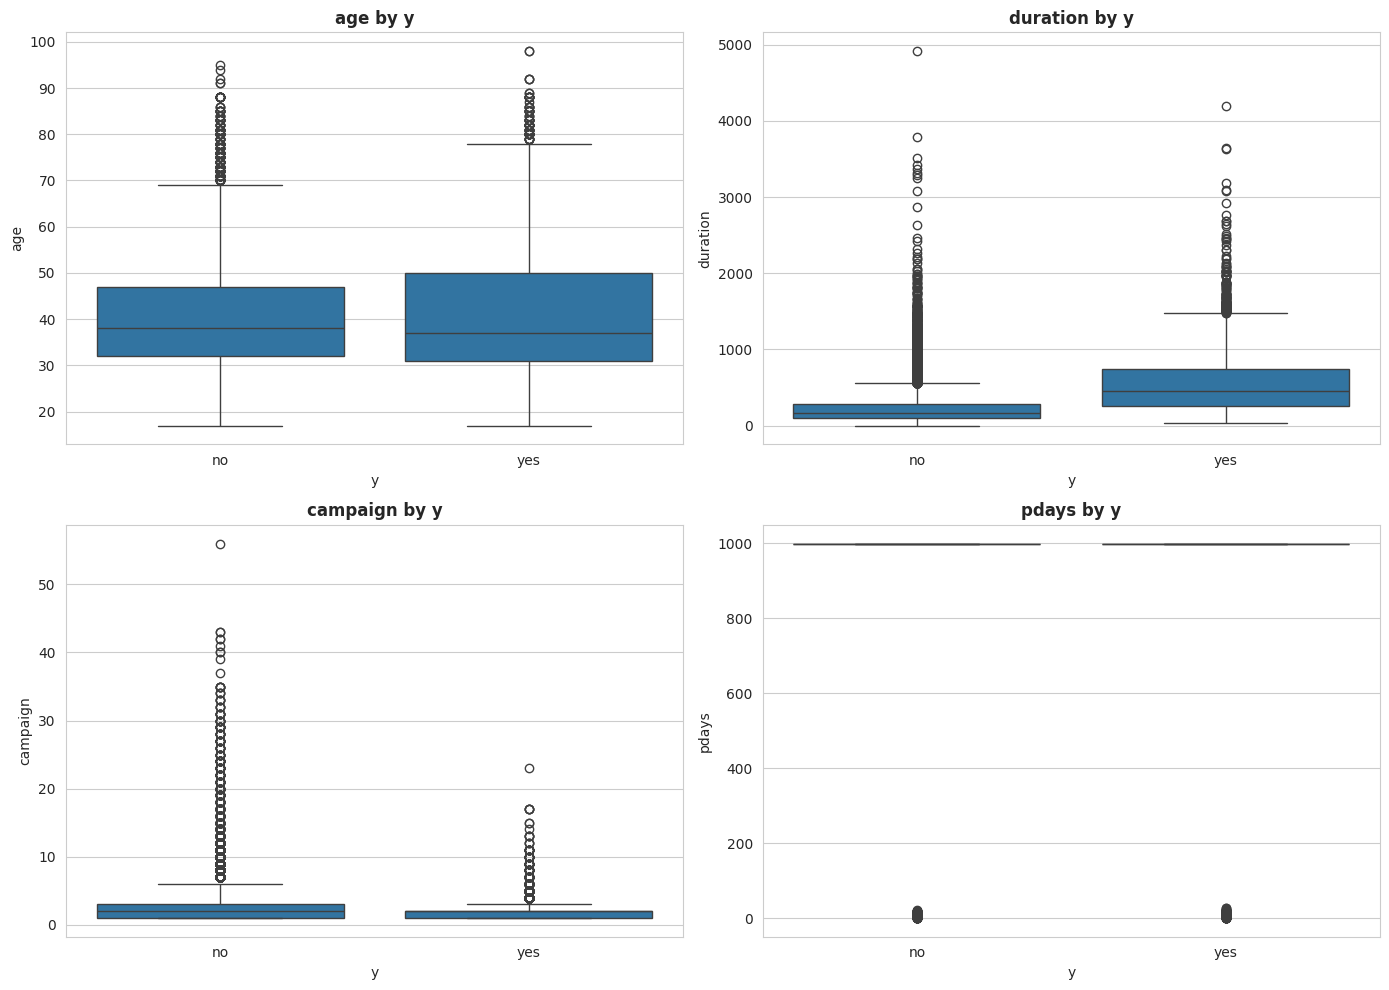

In [14]:
# Cell 13: Target vs Numerical Variables
if target_col in df.columns:
    print(f"\n=== TARGET vs NUMERICAL VARIABLES ===")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(num_cols[:4]):
        sns.boxplot(x=target_col, y=col, data=df, ax=axes[idx])
        axes[idx].set_title(f'{col} by {target_col}', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


=== TARGET vs CATEGORICAL VARIABLES ===


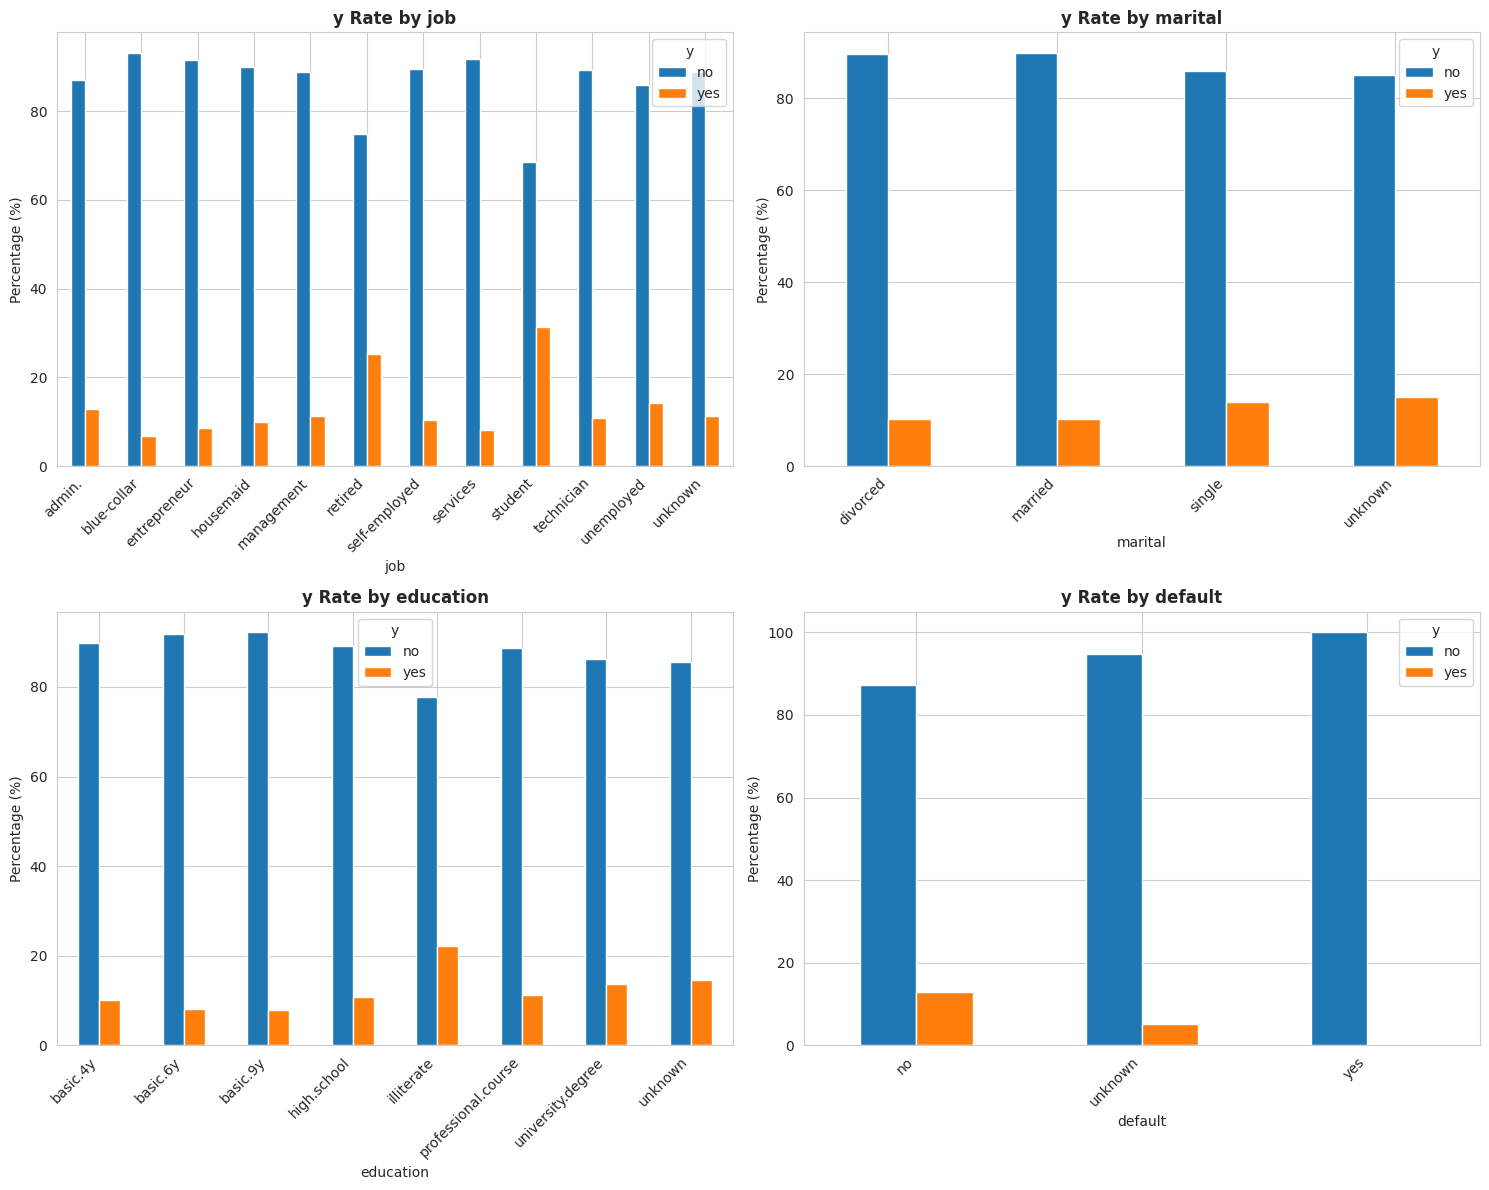

In [15]:
# Cell 14: Target vs Categorical Variables
if target_col in df.columns:
    print(f"\n=== TARGET vs CATEGORICAL VARIABLES ===")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, col in enumerate(cat_cols[:4]):
        cross_tab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[idx], stacked=False)
        axes[idx].set_title(f'{target_col} Rate by {col}', fontweight='bold')
        axes[idx].set_ylabel('Percentage (%)')
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

In [16]:
# Cell 15: Skewness and Kurtosis
print("\n=== SKEWNESS AND KURTOSIS ===")
skew_kurt = pd.DataFrame({
    'Skewness': df[num_cols].skew(),
    'Kurtosis': df[num_cols].kurtosis()
})
print(skew_kurt)


=== SKEWNESS AND KURTOSIS ===
                Skewness   Kurtosis
age             0.784697   0.791312
duration        3.263141  20.247938
campaign        4.762507  36.979795
pdays          -4.922190  22.229463
previous        3.832042  20.108816
emp.var.rate   -0.724096  -1.062632
cons.price.idx -0.230888  -0.829809
cons.conf.idx   0.303180  -0.358558
euribor3m      -0.709188  -1.406803
nr.employed    -1.044262  -0.003760


In [17]:
# Cell 16: Data Quality Summary
print("\n=== DATA QUALITY REPORT ===")
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Numerical Features: {len(num_cols)}")
print(f"Categorical Features: {len(cat_cols)}")


=== DATA QUALITY REPORT ===
Total Rows: 41188
Total Columns: 21
Duplicate Rows: 12
Missing Values: 0
Numerical Features: 10
Categorical Features: 11
